### numpy学习总结
为什么使用numpy？
numpy的算法比纯python快10-100倍，并且使用内存更少。

### ndarray：一种多维数组对象
该对象是一个快速而灵活的大数据集容器。可以对其进行数学计算，语法和标量元素计算相同。

In [2]:
import numpy as np
data = np.random.randn(2,3)
data

array([[ 0.74033326,  0.78575868, -1.54334783],
       [-0.4122495 ,  1.22871555, -2.50800845]])

In [3]:
data*10

array([[  7.40333264,   7.85758676, -15.43347834],
       [ -4.12249496,  12.28715552, -25.08008446]])

In [4]:
data+data

array([[ 1.48066653,  1.57151735, -3.08669567],
       [-0.82449899,  2.4574311 , -5.01601689]])

ndarray是一个通用的同构数据多维容器，其所有元素都为相同类型。可以用shape查看数组维度，dtype来查看数据类型

In [5]:
data.shape

(2, 3)

In [9]:
data.dtype

dtype('float64')

### 创建array函数
np.array函数可以接受一切序列对象，然后产生一个新的含有传如数据的Numpy数组.

In [10]:
data1 = [6.,7.,8.,0.1,1.]
arr1 = np.array(data1)
arr1

array([ 6. ,  7. ,  8. ,  0.1,  1. ])

In [11]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

可以用ndim来查看数组的秩

In [12]:
arr2.ndim

2

np.zeros、np.ones和np.empty可创建全0全1以及没有具体值的数组只有传入一个表示形状的元组即可

In [15]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [16]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [17]:
np.empty((1,5))

array([[ 6. ,  7. ,  8. ,  0.1,  1. ]])

np.arange

In [23]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

numpy的dtype可以直接映射到相应的机器表示，由于numpy的类型太多就不做详述。
可以用np.astype来转换类型
注意浮点数转换为整数，则小数部分会被截取删除(不是四舍五入）
字符串类型数组必须全为数字才可转换为数值类型
转换失败会引发VauleError。

In [25]:
arr = np.array([1.1,2.5,3.6,4.7])
arr.astype(np.int32)

array([1, 2, 3, 4])

In [26]:
arr = np.array(['1','2','3'])
arr.astype(np.int32)

array([1, 2, 3])

### NumPy数组运算
NumPy的数组不需要编写循环即可对数据执行批量运算。（矢量化）
算数运算上面已经演示过了，numpy数组还可以进行布尔数组运算

In [27]:
arr1 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2 = np.array([[1,2,3],[4,5,6]])
arr2 > arr1

array([[ True, False,  True],
       [False,  True, False]], dtype=bool)

### 基本的索引和切片
NumPy数组的切片表面和python无异，但它的值是会自动传播的，其数组的切片是原数据的视图而不是复制，视图上的任何修改都会直接反应到源数组上

In [28]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [31]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [32]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

如果你想得到一份副本而非视图你可以使用copy（）函数

numpy元素索引

In [45]:
arr = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [46]:
arr[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr[0,1]

array([4, 5, 6])

In [50]:
arr[0,1,2]

6

切片索引

In [51]:
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
arr[0,:2,1:2]

array([[2],
       [5]])

In [62]:
arr[:1,:2,1:2]

array([[[2],
        [5]]])

注意有：的切片索引会得到维数相同的数组

#### 布尔型索引
布尔数组的长度要和轴的长度相同，否则会报错。

可使用!,~,&,|符合不可用and。

In [69]:
names = np.array(['Bob','Joe','Will','Bob','Joe','Will'])
data = np.random.randn(6,6)
data

array([[-1.11665657,  1.68047419, -0.97223424, -0.36372748, -0.61356039,
         1.30689965],
       [-0.93208253,  0.70809965, -1.59337551, -1.8648364 ,  0.94690604,
        -0.47348234],
       [-0.81543518, -0.27995505, -0.84694558, -0.34364793,  0.48222453,
        -0.66050716],
       [ 1.36729308, -0.3826352 ,  0.04569759, -1.07440258,  0.03462689,
         1.45189203],
       [ 1.07914642,  0.67087325,  0.05262624,  0.28485475, -0.75723376,
        -0.3598988 ],
       [ 1.14114944,  0.02224294,  0.98943561, -0.20416792,  0.08301499,
        -1.22158984]])

In [70]:
data[names == 'Bob']

array([[-1.11665657,  1.68047419, -0.97223424, -0.36372748, -0.61356039,
         1.30689965],
       [ 1.36729308, -0.3826352 ,  0.04569759, -1.07440258,  0.03462689,
         1.45189203]])

#### 花式索引
利用整数数组进行索引

花式索引和切片不一样，它总是件数据复制到新数据组中

In [71]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [72]:
arr[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [73]:
arr[[-3,-5,-5]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

In [74]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [75]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

花式索引得到的数组总是一维的

想得到数组矩阵可以和切片索引结合起来

In [76]:
arr[[1,3,4,5]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [12, 15, 13, 14],
       [16, 19, 17, 18],
       [20, 23, 21, 22]])

### 数组转置和轴对换
转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。可以使用transpose方法，也可以使用T属性

In [77]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

np.dot计算矩阵内积

In [79]:
arr = np.random.randn(6,3)
arr

array([[ 1.42892087,  0.52724542,  0.57417567],
       [-0.28348748, -2.04527907,  0.99841262],
       [-0.72275027,  0.7903915 ,  0.20849757],
       [ 1.84634673, -0.41686112,  1.644683  ],
       [ 0.61222901, -0.45800573, -0.78947146],
       [ 0.61196641,  0.81823323,  1.07291325]])

In [80]:
np.dot(arr.T,arr)

array([[ 6.80287146,  0.212604  ,  3.59662705],
       [ 0.212604  ,  6.138921  , -1.02063491],
       [ 3.59662705, -1.02063491,  5.84936688]])

In [81]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [82]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [84]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [87]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### 通用函数：快速的元素级数组函数
一元（unary）ufunc，接收一个数组返回一个数组，如sqrt和exp

二元，接收两个数组返回一个数组，如add或maximun

返回多个数组，如modf（返回浮点数组的小数和整数部分）

可以进行原地计算

In [89]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)#meshgrid接受两个一维数组并产生两个二维矩阵
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [99]:
z = np.sqrt(xs**2 + ys**2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

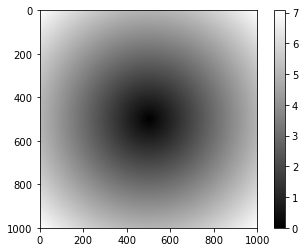

In [199]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()

### 将条件逻辑表述为数组运算
np.where（a,b,c)（a为真怎输出b，否则输出c）

b,c 数组大小可以不相等，甚至可以是标量值

In [105]:
arr = np.random.randn(4,4)
arr

array([[ 1.94617164, -0.5186051 , -0.87599343, -1.59440919],
       [-1.12184865,  0.39054884, -0.81844423,  0.02692068],
       [-0.52921326, -0.77536928, -0.05645019,  0.47187941],
       [ 1.65834368,  0.04107504, -0.65744968,  1.06037735]])

In [106]:
arr>0

array([[ True, False, False, False],
       [False,  True, False,  True],
       [False, False, False,  True],
       [ True,  True, False,  True]], dtype=bool)

In [108]:
np.where(arr>0,2,-2)

array([[ 2, -2, -2, -2],
       [-2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2,  2, -2,  2]])

数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。
sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简）既可以当做数组的实例方法调用，也可以当作顶级NumPy函数使用。

In [109]:
arr = np. random.randn(5,4)
arr

array([[ 0.53975629,  0.18213222,  0.7292408 , -0.9987105 ],
       [-0.81586768,  1.15847291, -1.5862416 ,  1.67398486],
       [-1.2906074 ,  1.76676521,  0.3507113 ,  0.78783966],
       [ 1.49666509,  0.80328017, -0.74744087, -0.05428745],
       [-0.05645071, -0.33036598,  2.00659842,  0.43838062]])

In [111]:
arr.mean()

0.30269276686480429

In [112]:
np.mean(arr)

0.30269276686480429

In [113]:
arr.sum()

6.0538553372960857

In [114]:
arr.sum(axis=0)

array([-0.12650442,  3.58028452,  0.75286805,  1.84720718])

In [115]:
arr.mean(axis=1)

array([ 0.1131047 ,  0.10758712,  0.40367719,  0.37455423,  0.51454059])

其他如cumsum（加）和cumprod（乘）之类的方法则不聚合，而是产生一个由中间结果组成的数组。

In [195]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [196]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [198]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### 用于布尔型数组的方法
用上面的方法布尔类型中True会转化为1，False会转化为0.

另外还有any和all方法，any测试数组中是否存在一个或者多个True，而all则检查数组中所有值是否为True(也可用在非布尔型数组，所有非0元素将会被当作True。

In [120]:
arr = np.random.randn(100)

In [121]:
(arr>0).sum()

52

In [122]:
bools = np.array([False,False,True,False])
bools.any()

True

In [123]:
bools.all()

False

### 排序
跟python列表相同，通过sort方法

In [124]:
arr = np.random.randn(6)
arr

array([-0.54821326,  0.97139289,  0.35004637,  0.24512398,  0.03392821,
        1.54352095])

In [126]:
arr.sort()
arr

array([-0.54821326,  0.03392821,  0.24512398,  0.35004637,  0.97139289,
        1.54352095])

In [127]:
#sort可以在任意轴上排序
arr = np.random.randn(5,3)
arr

array([[ 0.97890177,  0.56611301,  1.9893605 ],
       [ 1.06543065,  0.14418527,  0.51137614],
       [-0.34579532, -1.70041639,  0.52069477],
       [ 0.27893179,  0.87510621,  0.11399916],
       [-0.49211688,  0.77000808,  1.86614526]])

In [128]:
arr.sort(1)

array([[ 0.56611301,  0.97890177,  1.9893605 ],
       [ 0.14418527,  0.51137614,  1.06543065],
       [-1.70041639, -0.34579532,  0.52069477],
       [ 0.11399916,  0.27893179,  0.87510621],
       [-0.49211688,  0.77000808,  1.86614526]])

In [133]:
#可以用排序计算分位数
large_arr = np.random.randn(1000)
large_arr.sort()

In [131]:
large_arr[int(0.05*len(large_arr))]#求5%的数

-1.6190364292209027

### 唯一化以及其它的集合逻辑
NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果

np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

intersect1d（x，y）计算x和y中的公共元素，并返回有序结果

union1d（x，y）计算x和y的并集，并返回有序结果

setdiff1d（x，y）集合的差，即元素在x中且不在y中

setxor1d（x，y）集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素

In [135]:
names = np.array(['Bob','Joe','Will','Bob','Bob','Joe','Will'])

In [136]:
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [138]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [139]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

### 用于数组的文件输入输出
NumPy能够读写磁盘上的文本数据或二进制数据

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组以未压缩的原始二进制格式保存在扩展名名为.npy的文件中

In [140]:
arr = np.arange(10)
np.save('some_array', arr)

In [142]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [143]:
#np.savez可将多个数组保存到未压缩的文件中
np.savez('array_archive.npz',a=arr, b=arr)

In [144]:
arch = np.load('array_archive.npz')

In [145]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [146]:
np.savez_compressed('arrays_compressed.npz',a = arr,b = arr)

### 线性代数
dot函数

In [148]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])
x.dot(y)#x.dot(y)等价于np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

In [149]:
#一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组
np.dot(x,np.ones(3))

array([  6.,  15.])

In [150]:
#@符（类似Python3.5）也可以用作中缀运算符，进行矩阵乘法
x@np.ones(3)

array([  6.,  15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。

diag 以一维数组的形式返回方阵的对角线（或非对角线）元素，或将一维数组转换为方阵（非对角线元素为0）

dot矩阵乘法

trace计算对角线元素的和

det计算矩阵行列式

eig计算方阵的本征值和本征向量

inv计算方阵的逆

pinv计算矩阵的Moore-Penrose伪逆

qr计算QR分解

svd 计算奇异值分解（SVD)

solve解线性方程组Ax=b，其中A为一个方阵

istsq计算Ax=b的最小二乘解

In [154]:
from numpy.linalg import inv,qr
X = np.random.randn(5,5)
mat = X.T.dot(x)
inv(mat)

array([[ -9.44330816e+00,  -1.41514308e+01,  -8.77844650e+00,
          1.53652209e+01,  -1.10282820e+00],
       [  9.42663235e-01,   2.08535512e+00,   1.12663675e+00,
         -2.29182599e+00,  -3.75010833e-02],
       [ -6.84541443e-01,  -1.03777802e+00,  -5.48395157e-01,
          8.24776512e-01,  -2.06655005e-01],
       [ -6.49537435e-01,  -1.64713262e+00,  -9.80057499e-01,
          1.93739742e+00,  -2.17876339e-01],
       [  1.11143582e+00,   1.19409917e+00,   9.28096742e-01,
         -8.71831469e-01,  -5.02532883e-04]])

In [155]:
mat.dot(inv(mat))

array([[  1.00000000e+00,   1.17667960e-15,   5.71061777e-16,
          9.20517017e-16,  -1.13242209e-16],
       [ -1.56816034e-16,   1.00000000e+00,   6.49952894e-17,
         -1.36783550e-16,   6.53711912e-17],
       [  1.29370393e-16,  -1.17876406e-15,   1.00000000e+00,
         -9.05825281e-16,   2.67131888e-17],
       [  3.32016997e-16,  -6.16152669e-16,  -4.66669254e-16,
          1.00000000e+00,   8.75962067e-17],
       [ -1.26799237e-16,   6.37456370e-16,  -9.97742696e-17,
         -1.04756067e-16,   1.00000000e+00]])

In [156]:
q, r = qr(mat)

In [157]:
r

array([[ 0.76697565,  1.39846057, -1.1906677 , -2.48710391,  2.64684922],
       [ 0.        , -3.48596898,  1.68875235, -4.14349262,  1.51458164],
       [ 0.        ,  0.        , -4.60370096,  1.17440037, -2.020057  ],
       [ 0.        ,  0.        ,  0.        , -0.8547618 , -1.0552896 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.48322057]])

### 伪随机数生成
numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

seed确定随机数生成器的种子

permutation返回一个序列的随机排列或返回一个随机排列的范围

shuffle对一个序列就地随机排列

rand产生均匀分布的样本值

randint从给定的上下限范围内随机选取整数

randn产生正态分布（平均值为0，标准差为1）的样本值，类似于MATLAB接口

binomial产生二项分布的样本值

normal产生正态（高斯）分布的样本值

beta产生Beta分布的样本值

chisquare产生卡方分布的样本值

gamma产生Gamma分布的样本值

uniform产生在[0,1)中均匀分布的样本值

In [160]:
samples = np.random.normal(size=(4,4))
samples

array([[ 0.96944194, -0.49793882,  0.02631149,  0.91396273],
       [-1.00597617,  1.55417576, -0.71736975, -2.67161256],
       [-0.37174036,  0.02217099, -0.46116703,  0.00564758],
       [ 0.38205014,  0.23932081, -0.11674845,  1.97701986]])

In [164]:
#numpy的nomarl要比python的快
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.23 s ± 76.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
%timeit np.random.normal(size=N)

45.4 ms ± 4.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 示例：随机漫步
简单的随机漫步例子：从0开始，步长1和-1出现的概率相等。

In [166]:
#通过random实习纯python的方式实现1000步的随机漫步
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

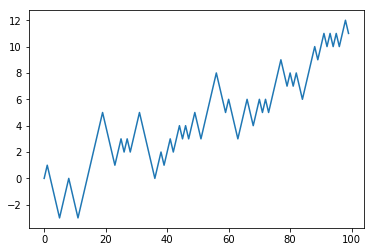

In [171]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.plot(walk[:100])

In [172]:
#用numpy做随机漫步
nsteps = 100
draws = np.random.randint(0,2,size=nsteps)

In [173]:
steps = np.where(draws >0,1,-1)
walk = steps.cumsum()

In [174]:
walk.min()

-4

In [175]:
walk.max()

7

In [181]:
(np.abs(walk)>= 5).argmax()

58

### 一次模拟多个随机漫步

In [183]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))

In [184]:
steps = np.where(draws > 0,1,-1)

In [186]:
walks = steps.cumsum(1)
walks

array([[ -1,   0,  -1, ...,  -8,  -9, -10],
       [ -1,  -2,  -3, ...,  30,  31,  32],
       [  1,   0,  -1, ..., -18, -17, -16],
       ..., 
       [  1,   0,   1, ...,  30,  29,  28],
       [ -1,  -2,  -3, ..., -20, -21, -20],
       [  1,   2,   1, ..., -16, -15, -16]], dtype=int32)

In [187]:
walks.max()

122

In [188]:
walks.min()

-114

In [190]:
hits30 = (np.abs(walks)>=30).any(1)
hits30

array([False,  True,  True, ...,  True,  True,  True], dtype=bool)

In [191]:
hits30.sum()

3368

In [192]:
crossing_times = (np.abs(walks[hits30])>=30).argmax(1)

In [193]:
crossing_times.mean()

506.12173396674586

In [194]:
steps = np.random.normal(loc=0,scale=0.25,size=(nwalks,nsteps))